# Machine Learning

*Екатерина Лобачева / Илья Щуров / Сергей Сметанин *

*Совместный бакалавриат НИУ ВШЭ и РЭШ, 2016-17 учебный год*

[Страница курса](http://math-info.hse.ru/2016-17/Machine_Learning)

Задание основано на [этой практической работе](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/homeworks-practice/homework-practice-03-ensembles.ipynb).

### Задача 1
Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец (`quality`) — целевая переменная (содержит классы).
1. С помощью [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) с `cv=3` (3-fold cross validation) оцените качество ([`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) — нужно передать этот объект в качестве параметра `scoring` при вызове `cross_val_score`) следующих классификаторов (соответствующую модель нужно передать функции `cross_val_score` в качестве первого параметра):
    * `DecisionTreeClassifier`;
    * `BaggingClassifier` со 100 деревьями;
    * `BaggingClassifier` со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода);
    * `RandomForestClassifier` со 100 деревьями.
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что *RandomForest* — это более сложный алгоритм, чем бэггинг и бэггинг со случайно выбранным набором признаков. Дело в том, что в *RandomForest* выбор случайного набора признаков происходит на каждом шаге построения дерева.

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

X_data=data.iloc[:, 0:11]
Y_data=data.iloc[:, 11:12]
X=np.array(X_data)
Y=np.array(Y_data)
Y_flat=Y.ravel()
scorer = make_scorer(accuracy_score)

D_tree= DecisionTreeClassifier()
Bag=BaggingClassifier(D_tree, n_estimators=100)
Bag_half=BaggingClassifier(D_tree, n_estimators=100, max_features=0.5)
Forest=RandomForestClassifier(n_estimators=100)

score_tree=cross_val_score(D_tree, X, Y_flat, scoring=scorer, cv=3)
score_bag=cross_val_score(Bag, X, Y_flat, scoring=scorer, cv=3)
score_half_bag=cross_val_score(Bag_half, X, Y_flat, scoring=scorer, cv=3)
score_forest=cross_val_score(Forest, X, Y_flat, scoring=scorer, cv=3)

print(score_tree, '\n' ,score_bag, '\n' ,score_half_bag, '\n' ,score_forest, '\n', 'Качество действительно улучшается', sep='')

[ 0.46542056  0.40712946  0.46892655]
[ 0.54392523  0.57410882  0.59698682]
[ 0.51028037  0.56285178  0.57815443]
[ 0.53084112  0.57035647  0.59322034]
Качество действительно улучшается


### Задача 2
Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 100 до 5000 деревьев с шагом 100, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

**Рекомендация.**

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $100 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса `RandomForestClassifier` нужно указать в том числе `warm_start=True`. Затем обучить алгоритм с помощью метода `fit()`, использовать метод `predict()` для классификации. После этого с помощью метода `set_params()` изменить параметр `n_estimators`. Если к полученному объекту применить метод `fit`, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

C:\Users\Dima\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


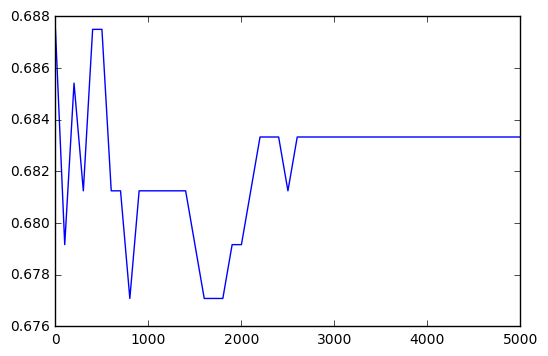

In [3]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
Y_train_flat=Y_train.ravel()
Y_test_flat=Y_test.ravel()
score_plot=np.array([0.]*51)

Forest=RandomForestClassifier(n_estimators=100, warm_start=True)
Forest.fit(X_train, Y_train_flat)
Y_pred = Forest.predict(X_test)
Y_pred_flat=Y_pred.ravel()
score_plot[0]=accuracy_score(Y_test_flat, Y_pred_flat)

for i in range(50):
    Forest.set_params(n_estimators=100*(2+i))
    Forest.fit(X_train, Y_train_flat)
    Y_pred = Forest.predict(X_test)
    Y_pred_flat=Y_pred.ravel()
    score_plot[i+1]=accuracy_score(Y_test_flat, Y_pred_flat)

x_axis = np.linspace(0, 5000, 51)
plt.plot(x_axis, score_plot)

for i in range(100):
    y_axis = score_plot[i]

После построения 30 графиков можно сделать вывод, что в среднем максимальное качество на тесте наблюдается при наличии в лесу около 2000 деревьев. При усложнении алгоритма он слишком сильно подстраивается под конкретные значения в выборке(в том числе учится на шуме) и хуже предсказывает вне ее, то есть переобучается.

### Задача 3
Решить задачу 2 для градиентного бустинга (`GradientBoostingClassifier`). Описать различия.

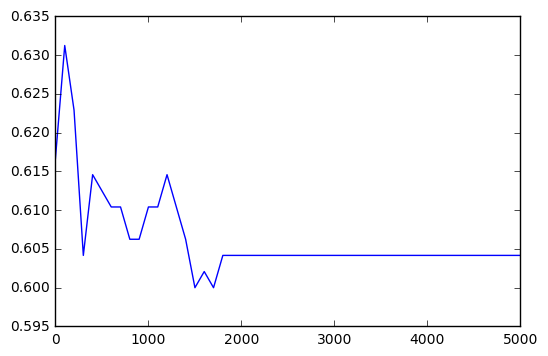

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

Y_train_flat=Y_train.ravel()
Y_test_flat=Y_test.ravel()
score_plot=np.array([0.]*51)

Gradient=GradientBoostingClassifier(n_estimators=100, warm_start=True)
Gradient.fit(X_train, Y_train_flat)
Y_pred = Gradient.predict(X_test)
Y_pred_flat=Y_pred.ravel()
score_plot[0]=accuracy_score(Y_test_flat, Y_pred_flat)

for i in range(50):
    Gradient.set_params(n_estimators=100*(2+i))
    Gradient.fit(X_train, Y_train_flat)
    Y_pred = Gradient.predict(X_test)
    Y_pred_flat=Y_pred.ravel()
    score_plot[i+1]=accuracy_score(Y_test_flat, Y_pred_flat)
    
for x in range()

x_axis = np.linspace(0, 5000, 51)
plt.plot(x_axis, score_plot)

y_axis = np.linspace(0, 4000, 52)
plt.accuracy_score++

z

В среднем и максимальное, и среднее качество градиентного бустинга оказалось меньше. Но зато он гораздо обучается, то есть быстрее достигает своего максимального качества на выборке и на тесте, но и как следствие быстрее переобучается. Градиентный бустинг с 300 деревьями достигает максимального качества на тесте, а при 2000 деревьев он видимо достигает максимального качества на выборке и после этого увеличение количества деревьев ни на что не влияет.